# Analysis of Blazhko stars

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
#| code-fold: false
# IMPORTING LIBRARIES
# --------------------

# AstroML
from astroML.datasets import fetch_LINEAR_sample
from astropy.coordinates import SkyCoord
import astropy.units as u

# Basic libraries
import pickle
import os
import sys
from tqdm import tqdm

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

# DataFrame analysis
import pandas as pd

# Math libraries
import numpy as np
import scipy as sc
from scipy.stats import norm

# CONFIGURATION
# -------------
sns.set_theme() # setting the theme for plotting
sys.path.insert(0,'../src/')
np.random.seed(42)

# configuring plotting colors
colors = ['#5F6372', '#79A8A4', '#B2AD8F', '#92A186', '#AD8082']
blue = '#5F6372'
turqoise = '#79A8A4'
light_green = '#B2AD8F'
green = '#92A186'
pink = '#AD8082'
muted_colors = sns.set_palette(sns.color_palette(colors))

# configuring fonts for plotting
font = FontProperties()
font.set_family('avenir')
font.set_name('Big Caslon')
font.set_style('normal')
font.set_size('xx-large')


%matplotlib inline  

In [10]:
#| code-fold: false
# Importing custom libraries
# ----------------------------
sys.path.insert(0,'../src/')
from BE_plotting import*
#from RR_lyrae_params import*
from blazhko_analysis import*

In [11]:
#| code-fold: false
# DATA
dataLINEAR = fetch_LINEAR_sample(data_home='../inputs') # fetching the data from astroML data library
end = 'FINAL_FINAL_FINAL_complete'

# DATA from previous notebook
BE_STARS = pd.read_csv("../outputs/FINAL_BE_CATALOGUE.csv")
rrlyrae = pd.read_csv('../outputs/Lrrlyr_unprocessed.csv')
periodogr = pickle.load(open("../outputs/periodograms_"+end+".pkl", "rb"))
fits = np.load("../outputs/fits_"+end+".npy", allow_pickle=True)
ztf_data = np.load("../outputs/ztf_data_filter"+end+".npy", allow_pickle=True)

In [12]:
BE_STARS.head()

,LINEAR id,Plinear,Pztf,Pmean,Pratio,NdataLINEAR,L_rms,L_chi2dof,L_chi2dofR,Lmean_rms,...,BlazhkoPeriodZ,BpowerRatioZ,BsignificanceZ,Ampl_diff,dP,IndicatorType,ChiType,BE_score,period_vs_amp,Quality flag
0,61011,0.662374,0.643294,0.652834,0.971195,274,0.073564,78.9,5.1,0.845785,...,295.8580,0.0149,2.2053,0.27,0.02923,NaN,L,9.0,period,3
1,810169,0.465185,0.465212,0.465198,1.000058,289,0.140729,6.0,2.1,0.158269,...,13.6184,0.0364,8.6093,0.16,0.00006,NaN,Z,6.0,period,3
2,1092244,0.649496,0.649558,0.649527,1.000095,590,0.106827,2.3,1.2,0.158591,...,13.6482,0.0747,0.0136,0.25,0.00010,NaN,Z,6.0,period,3
3,1212611,0.630896,0.630893,0.630894,0.999995,297,0.049308,0.9,0.9,0.050812,...,18.6047,0.0264,6.5970,0.18,0.00000,L,NaN,NaN,NaN,3
4,1736308,0.555848,0.555843,0.555846,0.999991,372,0.054970,2.9,1.3,0.054586,...,36.6367,0.0529,5.6501,0.11,0.00001,Z,NaN,NaN,NaN,3


## Adding the light curve type

In [13]:
rrlyrae.head()

,ra,dec,ug,gi,iK,JK,logP,Ampl,skew,kurt,magMed,nObs,LCtype,LINEARobjectID
0,119.526443,46.962120,1.166,0.369,1.018,0.269,-0.254138,0.619,-0.313,-0.567,16.37,301,1,29848
1,119.712975,52.149574,1.175,0.386,1.100,0.205,-0.191591,0.487,-0.291,-0.879,16.46,284,1,50402
2,119.187241,53.379295,1.123,0.207,1.074,0.210,-0.275092,0.624,-0.547,-0.322,16.54,276,1,62892
3,120.294960,40.932457,1.180,0.237,1.087,0.368,-0.170871,0.753,-0.121,-0.927,15.39,177,1,91437
4,120.124542,40.656620,1.178,-0.145,0.835,0.277,-0.503252,0.550,0.140,-0.650,16.98,222,2,95250


In [28]:
LINEAR_RRLR = pd.read_csv('../outputs/LINEAR_RRLR.csv')

In [29]:
LINEAR_RRLR.head()

,ra,dec,ug,gi,iK,JK,logP,Ampl,skew,kurt,magMed,nObs,LCtype,LINEARobjectID
0,119.526443,46.962120,1.166,0.369,1.018,0.269,-0.254138,0.619,-0.313,-0.567,16.37,301,1,29848
1,119.324013,47.095505,1.356,0.521,1.167,0.311,-0.244691,0.709,-0.493,-0.997,15.02,289,1,32086
2,119.712975,52.149574,1.175,0.386,1.100,0.205,-0.191591,0.487,-0.291,-0.879,16.46,284,1,50402
3,118.491257,53.168125,0.805,0.554,1.618,0.198,-0.178900,0.695,-0.026,-1.059,14.08,274,1,61011
4,119.187241,53.379295,1.123,0.207,1.074,0.210,-0.275092,0.624,-0.547,-0.322,16.54,276,1,62892


In [32]:
len(list(LINEAR_RRLR['LINEARobjectID']))

5204

In [38]:
lctype = []

for i in range(len(list(LINEAR_RRLR['LINEARobjectID']))):
    lctype.append((LINEAR_RRLR['LINEARobjectID'][i], LINEAR_RRLR['LCtype'][i]))

be_lctype = []
for i in list(BE_STARS['LINEAR id']):
    for n in lctype:
        if i==n[0]:
            be_lctype.append(n)
print(len(be_lctype))
print(be_lctype[:4])

LCTYPE = [x[1] for x in be_lctype]
print(LCTYPE[:4])

60
[(61011, 1), (810169, 1), (1092244, 1), (1212611, 1)]
[1, 1, 1, 1]


In [39]:
BE_STARS['LCtype'] = LCTYPE

,LINEAR id,Plinear,Pztf,Pmean,Pratio,NdataLINEAR,L_rms,L_chi2dof,L_chi2dofR,Lmean_rms,...,BpowerRatioZ,BsignificanceZ,Ampl_diff,dP,IndicatorType,ChiType,BE_score,period_vs_amp,Quality flag,LCtype
0,61011,0.662374,0.643294,0.652834,0.971195,274,0.073564,78.9,5.1,0.845785,...,0.0149,2.2053,0.27,0.02923,NaN,L,9.0,period,3,1
1,810169,0.465185,0.465212,0.465198,1.000058,289,0.140729,6.0,2.1,0.158269,...,0.0364,8.6093,0.16,0.00006,NaN,Z,6.0,period,3,1
2,1092244,0.649496,0.649558,0.649527,1.000095,590,0.106827,2.3,1.2,0.158591,...,0.0747,0.0136,0.25,0.00010,NaN,Z,6.0,period,3,1
3,1212611,0.630896,0.630893,0.630894,0.999995,297,0.049308,0.9,0.9,0.050812,...,0.0264,6.5970,0.18,0.00000,L,NaN,NaN,NaN,3,1
4,1736308,0.555848,0.555843,0.555846,0.999991,372,0.054970,2.9,1.3,0.054586,...,0.0529,5.6501,0.11,0.00001,Z,NaN,NaN,NaN,3,1


## Nice graphs

- blazhko period histogram D
- difference between main and blazhko frequency D
- chi2 LINEAR vs. ZTF graph D
- RRAB and RRC ditribution
- map of the sky with blazhko stars

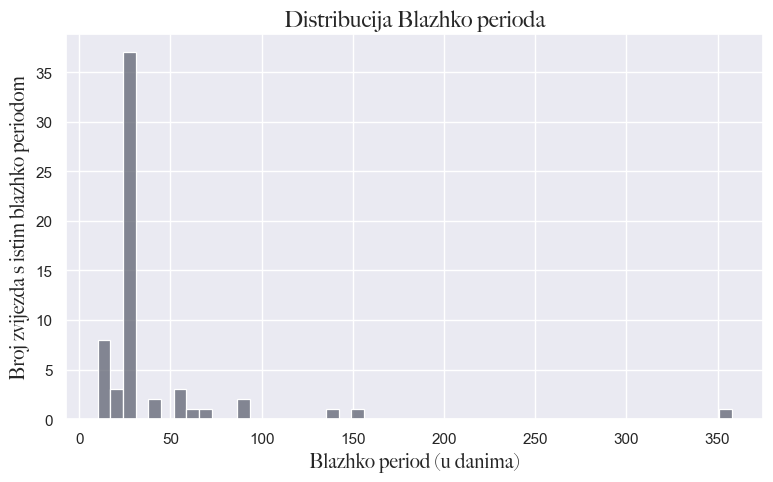

In [45]:
# Blazhko period histogram
# -----

plt.figure(figsize=(9,5))
sns.histplot(data=list(BE_STARS['BlazhkoPeriodL']),color=blue, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija LINEAR Blazhko perioda', fontproperties=font,fontsize=16)
plt.xlabel('LINEAR Blazhko period (u danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istim blazhko periodom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkoperiodL.png', dpi=650)
plt.show()

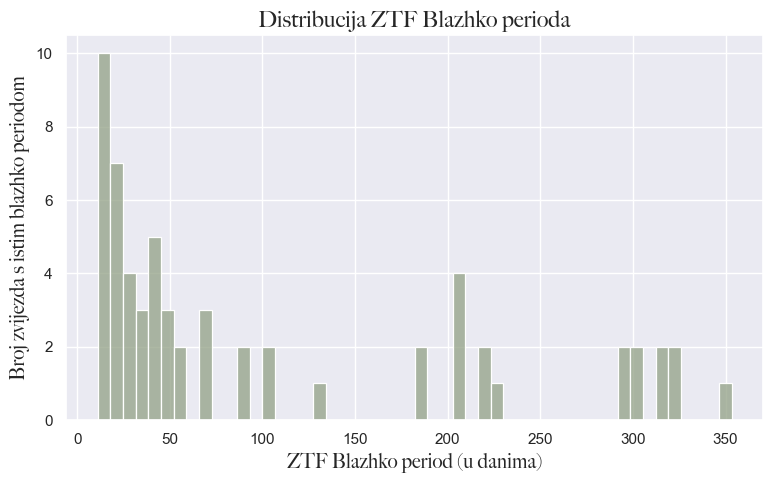

In [46]:
# Blazhko period histogram
# -----

plt.figure(figsize=(9,5))
sns.histplot(data=list(BE_STARS['BlazhkoPeriodZ']),color=green, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija ZTF Blazhko perioda', fontproperties=font,fontsize=16)
plt.xlabel('ZTF Blazhko period (u danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istim blazhko periodom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkoperiodZ.png', dpi=650)
plt.show()

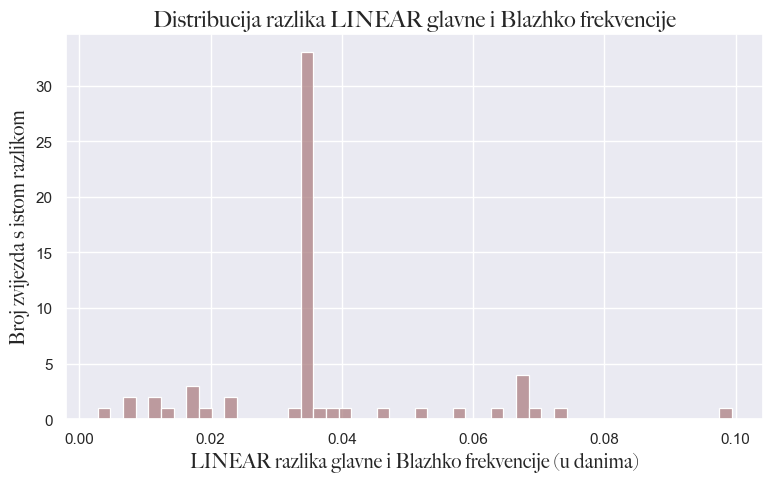

In [52]:
# histogram of frequency differences
# ------
plt.figure(figsize=(9,5))

freq_diff = list(BE_STARS['BlazhkoPeakL'] - BE_STARS['MainPeakL'])

sns.histplot(data=freq_diff,color=pink, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija razlika LINEAR glavne i Blazhko frekvencije', fontproperties=font,fontsize=16)
plt.xlabel('LINEAR razlika glavne i Blazhko frekvencije (u danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istom razlikom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkodiffL.png', dpi=650)
plt.show()

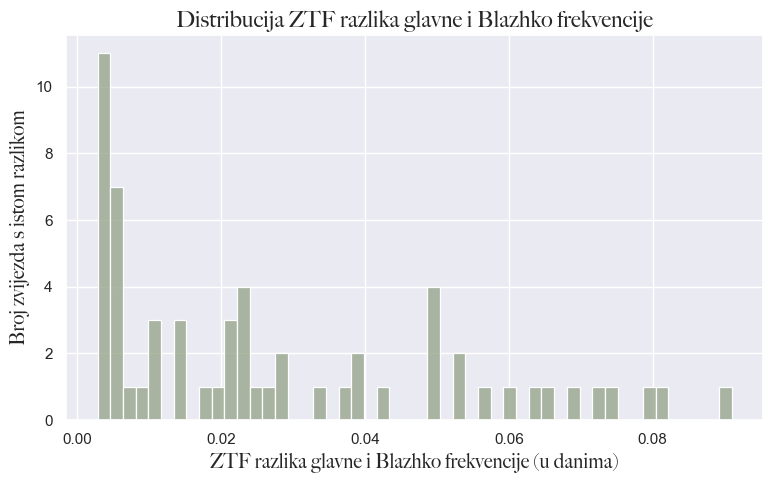

In [53]:
# histogram of frequency differences
# ------
plt.figure(figsize=(9,5))

freq_diff = list(BE_STARS['BlazhkoPeakZ'] - BE_STARS['MainPeakZ'])

sns.histplot(data=freq_diff,color=green, bins=50) # drawing a histogram of the distribution of measurements
plt.title('Distribucija ZTF razlika glavne i Blazhko frekvencije', fontproperties=font,fontsize=16)
plt.xlabel('ZTF razlika glavne i Blazhko frekvencije (u danima)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda s istom razlikom', fontproperties=font,fontsize=14)
plt.savefig('../images/BlazhkodiffZ.png', dpi=650)
plt.show()

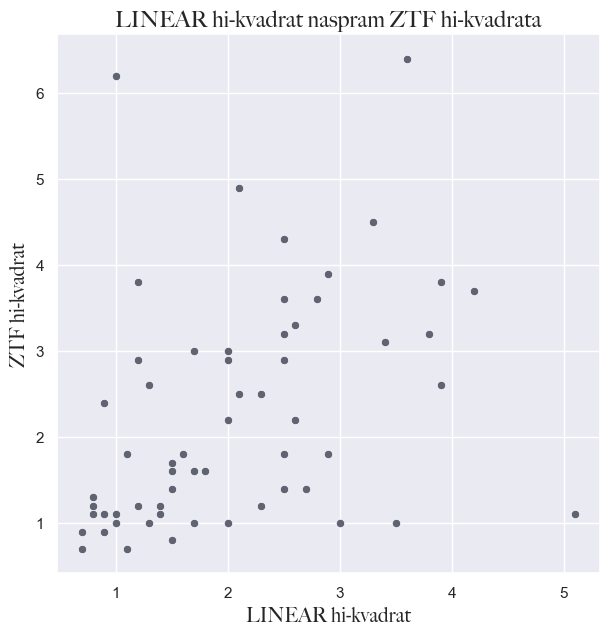

In [67]:
# scatterplot of periods
# ------
plt.figure(figsize=(7,7))

sns.scatterplot(data=BE_STARS, x='L_chi2dofR', y='Zchi2dofR')
#plt.xlim([0, 1.1])
#plt.ylim([0, 1.1])
plt.title('LINEAR hi-kvadrat naspram ZTF hi-kvadrata', fontproperties=font,fontsize=16)
plt.xlabel('LINEAR hi-kvadrat', fontproperties=font, fontsize=14)
plt.ylabel('ZTF hi-kvadrat', fontproperties=font,fontsize=14)
plt.savefig('../images/chi_scatter.png', dpi=650)
plt.show()

In [74]:
BE_STARS = BE_STARS.drop(57)
BE_STARS = BE_STARS.drop(58)
BE_STARS = BE_STARS.drop(59)

lc_counts = BE_STARS['LCtype'].value_counts().reset_index()
lc_counts.columns = ['LCtype', 'Count']

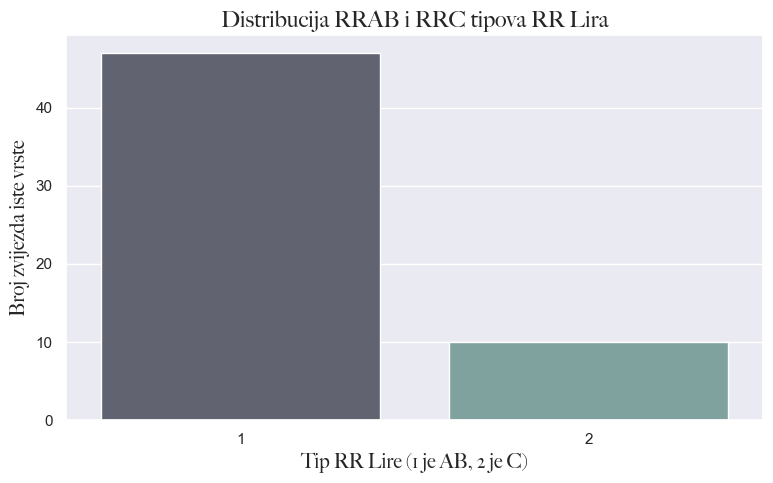

In [75]:
plt.figure(figsize=(9,5))   
sns.barplot(data=lc_counts, x='LCtype', y='Count', palette=muted_colors)
plt.title('Distribucija RRAB i RRC tipova RR Lira', fontproperties=font,fontsize=16)
plt.xlabel('Tip RR Lire (1 je AB, 2 je C)', fontproperties=font, fontsize=14)
plt.ylabel('Broj zvijezda iste vrste', fontproperties=font,fontsize=14)
plt.savefig('../images/RABC_distribution2.png', dpi=650)
plt.show()

In [76]:
p1 = round(lc_counts['Count'][0]/len(BE_STARS['LINEAR id']),4)*100
p2 = round(lc_counts['Count'][1]/len(BE_STARS['LINEAR id']), 4)*100
print(f'The percentage of RRAB stars is {p1}%, while for RRC stars it is {p2}% .')

The percentage of RRAB stars is 82.46%, while for RRC stars it is 17.54% .


In [80]:
coords = []

for i in range(len(list(LINEAR_RRLR['LINEARobjectID']))):
    coords.append((LINEAR_RRLR['LINEARobjectID'][i], LINEAR_RRLR['ra'][i], LINEAR_RRLR['dec'][i]))

be_coords = []
for i in list(BE_STARS['LINEAR id']):
    for n in coords:
        if i==n[0]:
            be_coords.append(n)
print(len(be_coords))
print(be_coords[:4])

ra = [x[1] for x in be_coords]
dec = [x[2] for x in be_coords]
print(dec[:4])

57
[(61011, 118.491257, 53.168125), (810169, 127.450302, 51.852364), (1092244, 170.805527, 1.021448), (1212611, 171.898666, 26.60338)]
[53.168125, 51.852364, 1.021448, 26.60338]


In [81]:
#| code-fold: false
# DETERMINING THE RECTASCENSION AND DECLINATION COORDS
rec_ab = []
dec_ab = []
RA = ra
DEC = dec

for i in range(len(list(BE_STARS['LINEAR id']))): # for every id in our dataset
    # look for the index of the current id in the total dataset of stellar attributes
    ra, dec = RA[i], DEC[i] # select rectascension and declination
    rec_ab.append(ra*u.deg) # convert ra into degrees for later conversion
    dec_ab.append(dec*u.deg) # convert dec into degrees for later conversion

print(len(rec_ab), len(dec_ab))

57 57


In [82]:
#| code-fold: false
# CONVERTING THE COORDINATES INTO GALACTIC COORDS

l_ab = []
b_ab = []

for k in range(len(rec_ab)): # for every star in our ab dataset
    # selection of ra and dec coords
    ra = rec_ab[k]
    dec = dec_ab[k]

    # converting them into galactic coordinates
    c = SkyCoord(ra=ra, dec=dec, frame='icrs')
    l = round(c.galactic.l.degree, 3)
    b = round(c.galactic.b.degree, 3)

    # convert the coordinates into a range from -180º to 180º for our projection 
    l_rad = np.radians(l)
    l_rad = np.mod(l_rad + np.pi, 2.0 * np.pi) - np.pi
    b_rad = np.radians(b)

    l_ab.append(l_rad)
    b_ab.append(b_rad)
print(len(l_ab), len(b_ab))

57 57


In [84]:
BE_STARS['lab'] = l_ab
BE_STARS['bab'] = b_ab
BE_STARS.head()

,LINEAR id,Plinear,Pztf,Pmean,Pratio,NdataLINEAR,L_rms,L_chi2dof,L_chi2dofR,Lmean_rms,...,Ampl_diff,dP,IndicatorType,ChiType,BE_score,period_vs_amp,Quality flag,LCtype,lab,bab
0,61011,0.662374,0.643294,0.652834,0.971195,274,0.073564,78.9,5.1,0.845785,...,0.27,0.02923,NaN,L,9.0,period,3,1,2.880526,0.533704
1,810169,0.465185,0.465212,0.465198,1.000058,289,0.140729,6.0,2.1,0.158269,...,0.16,0.00006,NaN,Z,6.0,period,3,1,2.912588,0.627795
2,1092244,0.649496,0.649558,0.649527,1.000095,590,0.106827,2.3,1.2,0.158591,...,0.25,0.00010,NaN,Z,6.0,period,3,1,-1.741472,0.984261
3,1212611,0.630896,0.630893,0.630894,0.999995,297,0.049308,0.9,0.9,0.050812,...,0.18,0.00000,L,NaN,NaN,NaN,3,1,-2.622479,1.244699
4,1736308,0.555848,0.555843,0.555846,0.999991,372,0.054970,2.9,1.3,0.054586,...,0.11,0.00001,Z,NaN,NaN,NaN,3,1,-1.842614,1.084966


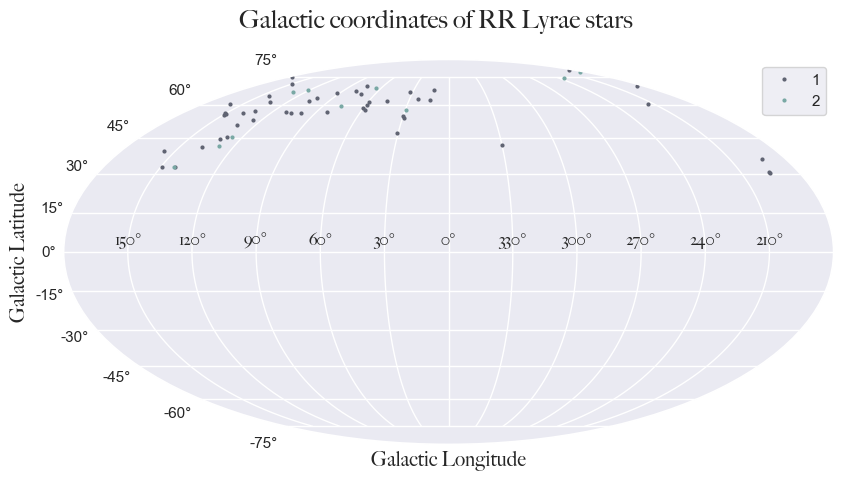

In [87]:
#| code-fold: false
# PLOTTING THE STARS

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')
groups = BE_STARS.groupby('LCtype')
for name, group in groups:
    plt.plot(group.lab, group.bab, marker='o', linestyle='', markersize=2, label=name)

ax.grid(True)
fig.suptitle('Galactic coordinates of RR Lyrae stars', fontproperties=font,fontsize=18)
ax.set_xticks(np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]))
ax.set_xticklabels(['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'], fontproperties=font, fontsize=12)
ax.set_xlabel('Galactic Longitude', fontproperties=font, fontsize=14)
ax.set_ylabel('Galactic Latitude', fontproperties=font, fontsize=14)
plt.legend()
plt.savefig('../images/galactic_coords_blazhko.png', dpi=650)
plt.show()